In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/Admin/Documents/Work/Machine Learning/Salary_Data.csv'
data = pd.read_csv(path)
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
data.isnull().sum()


Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [4]:
data.dropna(inplace = True)
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [5]:
data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
6699     True
6700     True
6701     True
6702     True
6703     True
Length: 6698, dtype: bool

In [6]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Education Level_encoded'] = le.fit_transform(data['Education Level'])
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education Level_encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,3
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,5
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0
4,52.0,Male,Master's,Director,20.0,200000.0,3
...,...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0,4
6624,27.0,Male,High School,Sales Manager,2.0,40000.0,2
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0,1
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0,1


In [8]:
x=data[['Age','Years of Experience']].values
y=data['Salary'].values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
x_test

array([[38., 10.],
       [28.,  3.],
       [31.,  4.],
       ...,
       [41., 13.],
       [31.,  7.],
       [24.,  3.]])

In [11]:
model.intercept_

53948.89032763633

In [12]:
model.coef_

array([ 111.04317585, 6060.89077197])

In [13]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_predict,y_test)
mse

946938302.5300587

In [14]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_predict,y_test)
mae

24242.455998270878

In [15]:
from sklearn.metrics import r2_score
r2 =  r2_score(y_test,y_predict)
r2

0.649888081903625

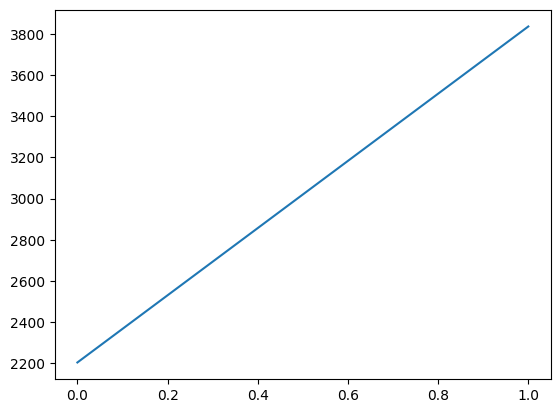

In [16]:
from sklearn import linear_model, datasets
regr = linear_model.LinearRegression(fit_intercept= False)
regr.fit(x_train,y_train)
regr.coef_
plt.plot(regr.coef_)
plt.show()